In [1]:
# Find the direction of dataset
import numpy as np
import pandas as pd
import os


In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPool1D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [3]:
#import pictures from drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/Data/'

In [5]:
print("reading dataframe")
info=pd.read_csv("/content/drive/My Drive/Data/data.csv")
info=info.drop('Unnamed: 32',axis=1)

reading dataframe


In [6]:
info

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
info['diagnosis']=le.fit_transform(info['diagnosis'])

In [8]:
info.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [9]:
info.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)

In [10]:
X=info.iloc[:,2:]
y=info.diagnosis

In [11]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02891,0.05198,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.02423,0.03950,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.03731,0.04730,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.06158,0.07117,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [13]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [14]:
len(X_train),len(X_test),len(y_train),len(y_test)

(455, 114, 455, 114)

In [15]:
X_tr = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1).astype('float32')
X_vd = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1).astype('float32')

y_tr = np.array(y_train)
y_vd = np.array(y_test)

In [16]:
X_tr.shape

(455, 25, 1)

In [17]:

def create_model():
    model = Sequential()
    model.add(Conv1D(32, 5, input_shape = X_tr.shape[1:3]))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv1D(64, 1))
    model.add(Flatten())
    model.add(Dense(128, input_dim=25))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [18]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 21, 32)            192       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 21, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 21, 64)            2112      
_________________________________________________________________
flatten (Flatten)            (None, 1344)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               172160    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [20]:
model = Sequential()

model.add(Dense(10, input_dim=25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
m=model.fit(X_train,y_train, epochs=600, batch_size=5, validation_split=0.2)

Epoch 1/600
73/73 [==============================] - 4s 5ms/step - loss: 11.1292 - accuracy: 0.3104 - val_loss: 1.1170 - val_accuracy: 0.7253
Epoch 2/600
73/73 [==============================] - 0s 3ms/step - loss: 0.9020 - accuracy: 0.7115 - val_loss: 0.6798 - val_accuracy: 0.7033
Epoch 3/600
73/73 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.7610 - val_loss: 0.3751 - val_accuracy: 0.8242
Epoch 4/600
73/73 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.8379 - val_loss: 0.3183 - val_accuracy: 0.9231
Epoch 5/600
73/73 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.8434 - val_loss: 0.2679 - val_accuracy: 0.9231
Epoch 6/600
73/73 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.8874 - val_loss: 0.2520 - val_accuracy: 0.9341
Epoch 7/600
73/73 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.8516 - val_loss: 0.2382 - val_accuracy: 0.9341
Epoch 8/600


In [22]:
loss_value , accuracy = model.evaluate(X_test, y_test)

print('Test_loss_value = ' +str(loss_value))
acc_CNN=round(accuracy*100,2)
print(acc_CNN)

print(model.predict(X_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9561
Test_loss_value = 0.13380958139896393
95.61
[[1.5863073e-03]
 [9.2509246e-01]
 [1.3509581e-03]
 [9.9998033e-01]
 [8.5965854e-01]
 [9.9996364e-01]
 [9.9849510e-01]
 [9.5409852e-01]
 [3.2497200e-04]
 [7.7116163e-04]
 [4.7465201e-05]
 [8.9187229e-01]
 [9.8170877e-01]
 [9.9581701e-04]
 [5.8481533e-02]
 [3.0615258e-03]
 [1.7452656e-05]
 [2.9264895e-05]
 [2.2824234e-01]
 [9.9999988e-01]
 [9.8272262e-04]
 [1.3963606e-04]
 [9.9710113e-01]
 [6.3404535e-05]
 [9.8082435e-01]
 [3.1310268e-02]
 [5.6982243e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.8456246e-01]
 [1.0000000e+00]
 [9.7856762e-05]
 [1.0000000e+00]
 [9.9300814e-01]
 [2.9199966e-04]
 [7.4032243e-05]
 [9.9978024e-01]
 [4.9849745e-02]
 [2.9855201e-01]
 [5.3343403e-05]
 [4.2663037e-06]
 [5.5439356e-03]
 [1.6903543e-04]
 [1.1888700e-02]
 [1.0800331e-04]
 [8.5195649e-01]
 [1.5447838e-02]
 [9.7460652e-06]
 [3.3188141e-03]
 [9.7011101e-01]
 [9.9999559e-01]
 [1.

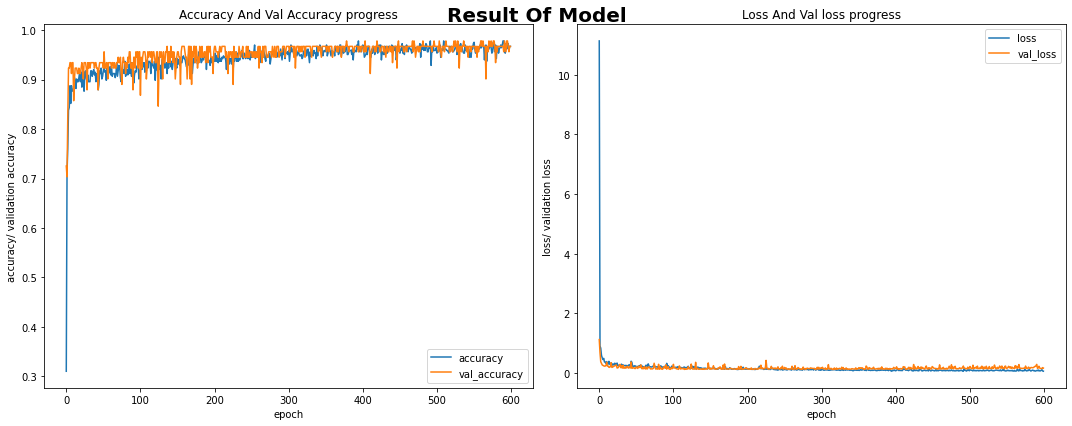

In [23]:

def Visualize_Result(accuracy,val_accuracy,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(accuracy)),
                     accuracy,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_accuracy)),
                     val_accuracy,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(m.history['accuracy'],m.history['val_accuracy'], m.history['loss'], m.history['val_loss'])

In [24]:
y_pred=model.predict(X_test)

In [25]:
y_pred.shape

(114, 1)

In [26]:
y_pred

array([[1.5863073e-03],
       [9.2509246e-01],
       [1.3509581e-03],
       [9.9998033e-01],
       [8.5965854e-01],
       [9.9996364e-01],
       [9.9849510e-01],
       [9.5409852e-01],
       [3.2497200e-04],
       [7.7116163e-04],
       [4.7465201e-05],
       [8.9187229e-01],
       [9.8170877e-01],
       [9.9581701e-04],
       [5.8481533e-02],
       [3.0615258e-03],
       [1.7452656e-05],
       [2.9264895e-05],
       [2.2824234e-01],
       [9.9999988e-01],
       [9.8272262e-04],
       [1.3963606e-04],
       [9.9710113e-01],
       [6.3404535e-05],
       [9.8082435e-01],
       [3.1310268e-02],
       [5.6982243e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.8456246e-01],
       [1.0000000e+00],
       [9.7856762e-05],
       [1.0000000e+00],
       [9.9300814e-01],
       [2.9199966e-04],
       [7.4032243e-05],
       [9.9978024e-01],
       [4.9849745e-02],
       [2.9855201e-01],
       [5.3343403e-05],
       [4.2663037e-06],
       [5.543935

In [27]:
np.argmax(model.predict(X_test), axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])



```
```

# Fuzzy

                 id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]
     texture_mean  perimeter_mean  ...  symmetry_mean  fractal_dimension_mean
0           10.38          122.80  ...         0.2419                 0.07871
1           17.77          132.90  ...         0.1812                 0.05667
2           21.25          130.00  ...         0.2069      

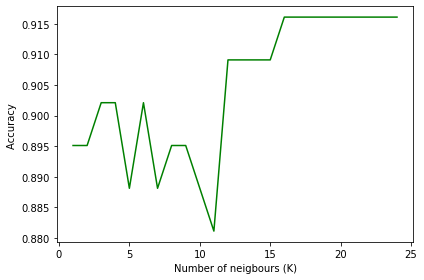

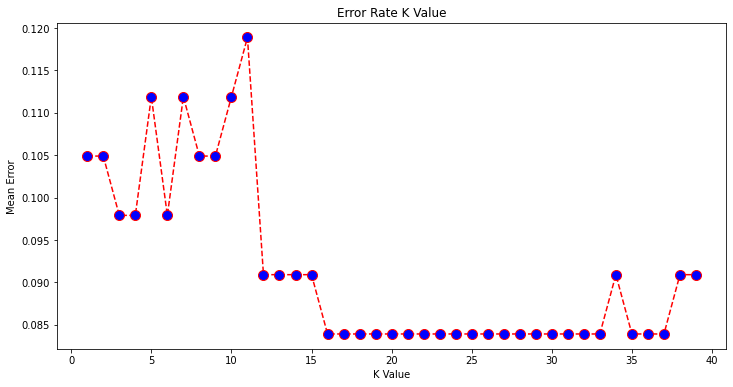

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import sklearn.grid_search
import sklearn.metrics
import sklearn.neighbors
import sklearn.decomposition
import sklearn
import sklearn.datasets
import random 
from sklearn.metrics import confusion_matrix

df = pd.read_csv("/content/drive/My Drive/Data/data.csv")


print(df.describe())

X = df.iloc[:,3:12]
print(X)
Y = df.iloc[:,1]
print (X.describe())
print (Y.describe())


df.head()




X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=90)


fuzzy = True

num_train = len(X_train)
num_test  = len(X_test)

print (num_test)
print (num_train)

X_train.head()

Y_train.head()

X_test.head()

Y_test.head()

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
Y_train=lc.fit_transform(Y_train)
Y_test=lc.transform(Y_test)




X_train = X_train.astype(int)
X_test = X_test.astype(int)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


print (X_test)
print (Y_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test, y_pred))
acc_fuzzy=round(accuracy_score(Y_test,y_pred)*100,2)
print(acc_fuzzy)
print(classification_report(Y_test, y_pred))



# Calculating accuaracy for different values of K's

Ks = 25
mean_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    
    #Train Model and Predict  
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_hat=model_knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(Y_test, y_hat)
    print('Accuracy at k =', n, 'is', mean_acc[n-1])


mean_acc

import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of neigbours (K)')
plt.tight_layout()
plt.show()



error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

error

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error');

# Recurrent neural network

In [29]:
import numpy as np
import pandas as pd
import os

In [30]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [31]:
info=pd.read_csv("/content/drive/My Drive/Data/data.csv")
print(info.head(5))
print(info.info())
print(info.describe())

print(info.isna().sum())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    floa

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
info['diagnosis']=le.fit_transform(info['diagnosis'])

In [33]:
info.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [34]:
info.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)

In [35]:
#last_label = np.array(last_label)
#img_path = np.array(img_path)
X=info.iloc[:,2:]
y=info.diagnosis

In [36]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [37]:
len(X_train),len(X_test),len(y_train),len(y_test)

(455, 114, 455, 114)

In [38]:
#x_train = np.array(x_train)
#x_test = np.array(x_test)
X_tr = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1).astype('float32')
X_vd = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1).astype('float32')

y_tr = np.array(y_train)
y_vd = np.array(y_test)

In [39]:
X_tr.shape

(455, 26, 1)

In [40]:
print("\n")
print("-----------------RNN-----------------")
print("\n")


tf.keras.backend.set_floatx('float64')
RNN = Sequential()

RNN.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
RNN.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
RNN.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
RNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=RNN.fit(X_train, y_train, batch_size = 10, epochs = 20,verbose = 2)

y_pred = RNN.predict(X_test)
y_pred = (y_pred > 0.5)

"Analysis Report"
print()
print("------Classification Report------")
print(classification_report(y_pred,y_test))

print()
print("------Classification Report------")
print(confusion_matrix(y_pred,y_test))

print()
print("------Accuracy------")
print(f" Accuracy_RNN :{(accuracy_score(y_pred,y_test)*100)}")
print()

val_loss, val_acc = RNN.evaluate(X_test,y_test)





-----------------RNN-----------------


Epoch 1/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 2/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 3/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 4/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 5/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 6/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 7/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 8/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 9/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 10/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 11/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 12/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 13/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 14/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 15/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 16/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 17/20
46/46 - 0s - loss: nan - accuracy: 0.6264
Epoch 18/20
46/46 - 0s - loss: nan - accuracy: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
acc_RNN=val_acc*100
print(acc_RNN)

63.1578947368421


In [42]:
results = pd.DataFrame({
    'Model': ['CNN','Fuzzy','RNN'],
    'Score': [acc_CNN,acc_fuzzy,acc_RNN]})
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Score
0,CNN,95.610000
1,Fuzzy,88.810000
2,RNN,63.157895


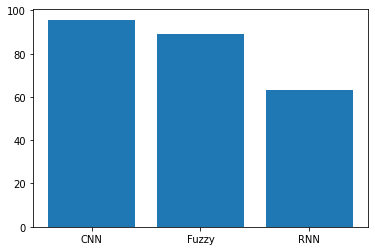

In [43]:
import matplotlib.pyplot as plt
plt.bar(result_df['Model'],result_df['Score']);

Text(0, 0.5, 'Accuracy')

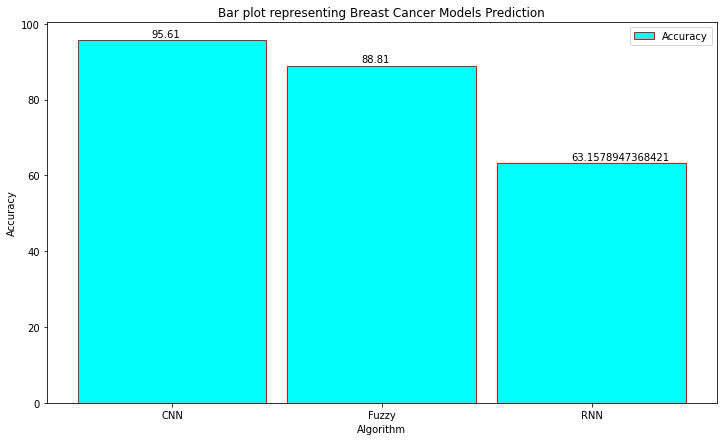

In [44]:
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.figure(figsize=(12,7))
Model=result_df['Model'].tolist()
Score=result_df['Score'].tolist()
plt.bar(Model, Score, width= 0.9, align='center',color='cyan', edgecolor = 'red')
# This is the location for the annotated text
i = 4.0
j = 1
# Annotating the bar plot with the values (total death count)
for i in range(len(Model)):
    plt.annotate(Score[i], (-0.1 + i, Score[i] + j))
# Creating the legend of the bars in the plot
plt.legend(labels = ['Accuracy'])
# Giving the tilte for the plot
plt.title("Bar plot representing Breast Cancer Models Prediction")
# Namimg the x and y axis
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
# Saving the plot as a 'png'
#plt.savefig('1BarPlot.png')
# Displaying the bar plot
#plt.show()